## Roshan Poudel - LAB04

**Multiclass Classification example, Single-label**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2023-02-13 16:40:07.481757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
train_data.shape

(8982,)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
#Decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#Note that the indices are offset by 3 because 0, 1, and 2 are reserved
#indices for “padding,” “start of sequence,” and “unknown.”

In [6]:
#vectorizing the sequences using multi-hot encoding

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
#vectorizing the sequences using one-hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

> The built in way to do one-hot encoding using keras

>>```py
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```

## Building the model

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

2023-02-13 16:40:17.798984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 16:40:17.800177: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [10]:
#set apart 1,000 samples in the training data to use as a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.6146 - accuracy: 0.5222 - val_loss: 1.7135 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.4012 - accuracy: 0.7086 - val_loss: 1.2723 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0232 - accuracy: 0.7834 - val_loss: 1.1212 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8019 - accuracy: 0.8277 - val_loss: 1.0054 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6350 - accuracy: 0.8636 - val_loss: 0.9453 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.5090 - accuracy: 0.8929 - val_loss: 0.9216 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4121 - accuracy: 0.9123 - val_loss: 0.8932 - val_accuracy: 0.8200
Epoch 8/20
16

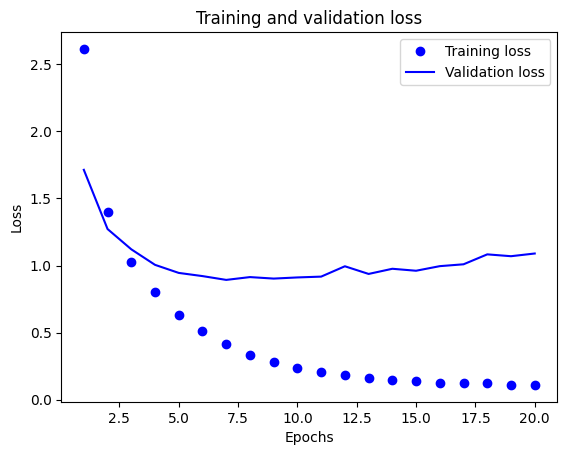

In [12]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

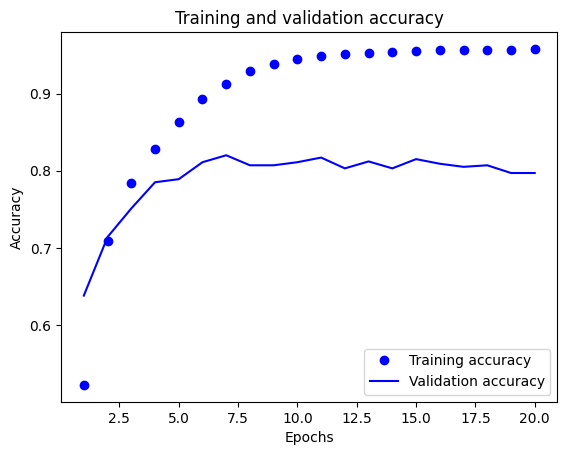

In [13]:
#Plotting the training and validation accuracy

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 22ms/step - loss: 2.4729 - accuracy: 0.5480
Epoch 2/9
18/18 [==============================] - 1s 32ms/step - loss: 1.3077 - accuracy: 0.7253
Epoch 3/9
18/18 [==============================] - 1s 31ms/step - loss: 0.9762 - accuracy: 0.7898
Epoch 4/9
18/18 [==============================] - 1s 30ms/step - loss: 0.7637 - accuracy: 0.8392
Epoch 5/9
18/18 [==============================] - 0s 24ms/step - loss: 0.6042 - accuracy: 0.8747
Epoch 6/9
18/18 [==============================] - 1s 34ms/step - loss: 0.4774 - accuracy: 0.9002
Epoch 7/9
18/18 [==============================] - 0s 28ms/step - loss: 0.3848 - accuracy: 0.9175
Epoch 8/9
18/18 [==============================] - 1s 29ms/step - loss: 0.3142 - accuracy: 0.9316
Epoch 9/9
71/71 [==============================] - 2s 31ms/step - loss: 0.9475 - accuracy: 0.7952


In [15]:
results

[0.9474698901176453, 0.7951914668083191]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case, we have 46 classes, and they may not be equally represented. What would be
the accuracy of a random baseline? 

In [16]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1834372217275156

As you can see, a random classifier would score around 19% classification accuracy, so
the results of our model seem pretty good in that light. 

In [17]:
predictions = model.predict(x_test)

71/71 [==============================] - 2s 32ms/step


In [18]:
predictions[0].shape

(46,)

In [19]:
np.sum(predictions[0])

1.0

In [20]:
np.argmax(predictions[0])

4

In [24]:
 len(predictions[0])

46

**This means that there are 46 predictions values generated. Another way to find this out is to look at the final dense layer in the model which has 46 output classes using softmax as activation function that converts the input real values into the a probability distribution of 46 values totalling to 1.**

#### Comparing this model with the IMDB one in LAB03

|Differences based on|IMDB| REUTERS|
|:----:|:----:|:----:|
|Number and type of layers|(3, Dense)|(3, Dense)|
|Number and type of inputs|9000 int vectors| 10000 int vectors|
|Number and type of output|1-dimensional vector|46-dimensional vector|
|Activation functions|ReLU and Softmax|ReLU and Sigmoid|
|Optimizer|rmsprop|rmsprop|
|Loss Function|binary_crossentropy|categorical_crossentropy|
|Resulting Training/Validation accuracy|88%|80%|